<u>**STOCK PRICE PREDICTION USING DECISION TREE AND MONTE CARLO**</u>

By: KUSHAGRA SEDWAL<br>


#**Import Libraries**

In [ ]:
pip install pandas numpy matplotlib scikit-learn yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


#**Load Data**


[*********************100%***********************]  1 of 1 completed


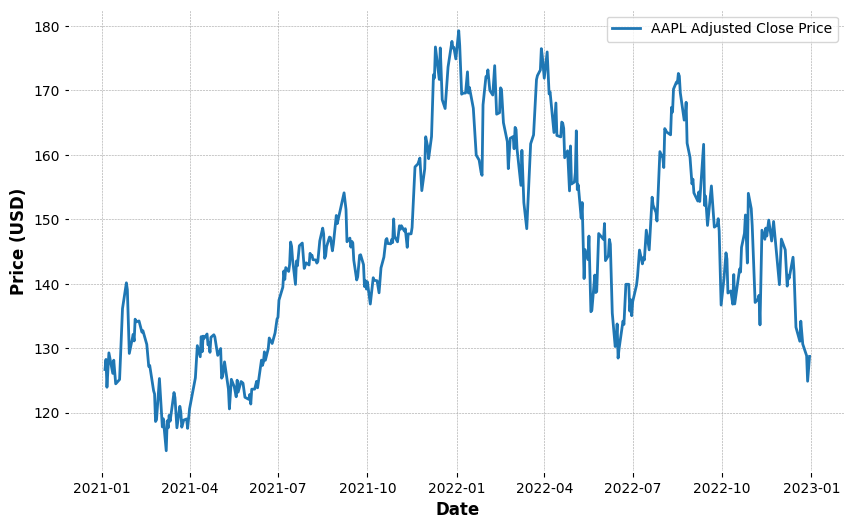

In [ ]:
import yfinance as yf

# Download historical data for Apple Inc. (AAPL)
data = yf.download('AAPL', start='2021-01-01', end='2023-01-01')

# Visualize closing price
plt.figure(figsize=(10,6))
plt.plot(data['Adj Close'], label=f'AAPL Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#**Data Preprocessing:**



In [ ]:
# Create a new dataframe with just the 'Adj Close' column
df = data[['Adj Close']].copy()

# Create feature data with 'n' previous days to predict the next day
def create_features(df, n=2):
    X, y = [], []
    for i in range(n, len(df)):
        X.append(df['Adj Close'].values[i-n:i])  # Use 'n' previous days as features
        y.append(df['Adj Close'].values[i])  # Use the next day as the label
    return np.array(X), np.array(y)

n_days = 2  # Number of previous days to use as features
X, y = create_features(df, n_days)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)


#**Build the Decision Tree Model:**


In [ ]:
# Build the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

#**Make Predictions:**


In [ ]:
# Predict stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Train MSE: 0.0
Test MSE: 15.263023642558572


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for training set
train_mape = mean_absolute_percentage_error(y_train, train_predict)

# Calculate MAPE for testing set
test_mape = mean_absolute_percentage_error(y_test, test_predict)

print(f'Train MAPE: {train_mape}')
print(f'Test MAPE: {test_mape}')

Train MAPE: 0.0
Test MAPE: 0.020104203325059515


#**Plot Predictions:**


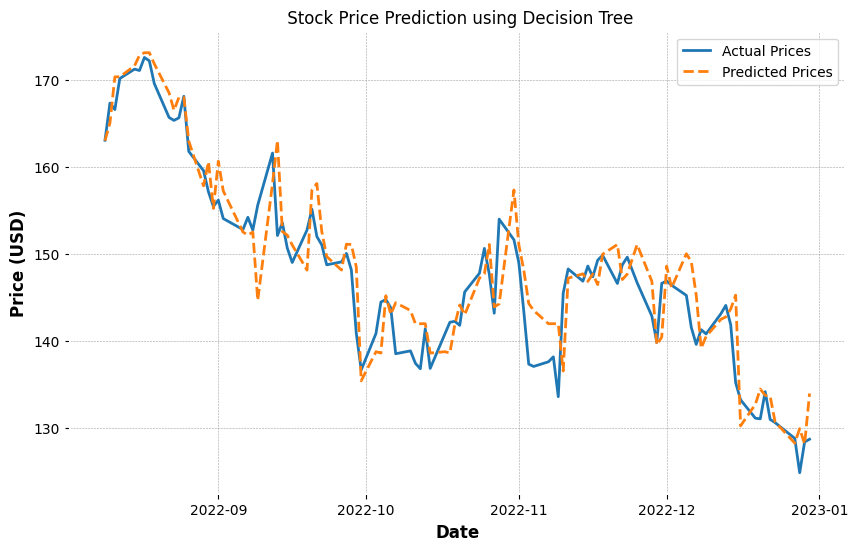

In [ ]:
# Plot actual vs predicted stock prices for the test set
plt.figure(figsize=(10,6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(test_predict):], test_predict, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title(' Stock Price Prediction using Decision Tree')
plt.legend()
plt.show()


In [ ]:
!pip install mplfinance==0.12.9b7

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
from datetime import datetime, timedelta
import mplfinance as mpf

DEFINE PARAMETERS FOR DATASET

In [ ]:
ticker = "AXISBANK.NS"
start_date = '2024-1-1'
end_date = '2024-10-21'

In [ ]:
def import_stock_data(ticker, start='2024-10-1' , end = '2024-10-22'):
    # Define a Dataframe for storing your stock data
    data = pd.DataFrame()

    # Using Yahoo Finance to get stock data
    stock = yf.Ticker(ticker)
    data = stock.history(start=start,end=end)

    return data

PLOTTING THE DATASET

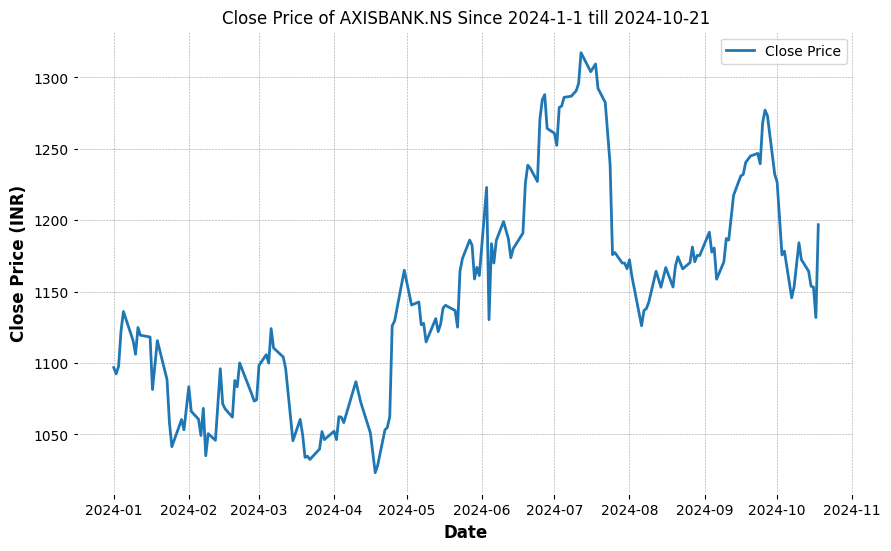

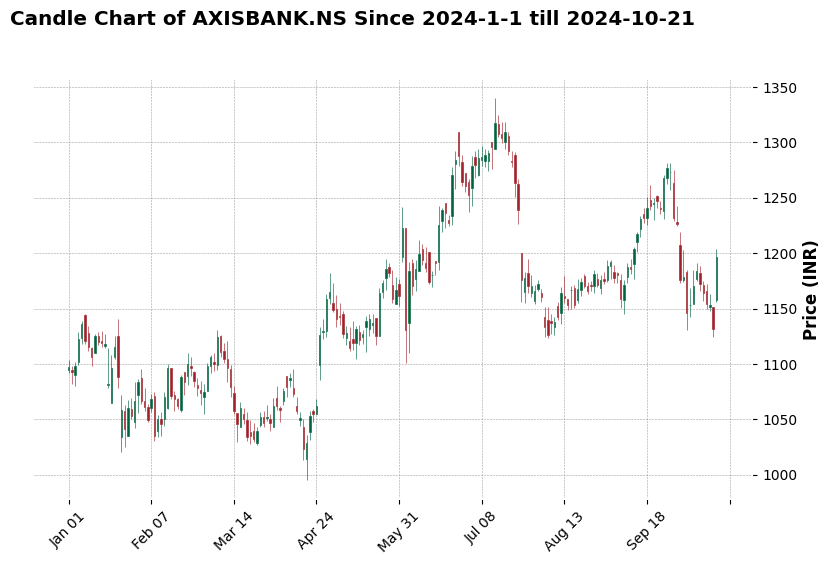

In [ ]:
data = import_stock_data(ticker, start = start_date, end = end_date)

# Plot the close price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'Close Price of {ticker} Since {start_date} till {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

mpf.plot(data, type='candle', style='charles', title=f'Candle Chart of {ticker} Since {start_date} till {end_date}',
         ylabel='Price (INR)', figsize=(10, 6))
mpf.show()

CALCULATING LOG RETURND AND PLOTTING THEM


In [ ]:
def log_returns(stock_data):

    # As we're interested in the 'Close' prices
    log_returns = np.log(1 + stock_data['Close'].pct_change())
    log_returns = log_returns[1:]

    return log_returns

Date
2024-10-14 00:00:00+05:30   -0.006933
2024-10-15 00:00:00+05:30   -0.009059
2024-10-16 00:00:00+05:30   -0.000564
2024-10-17 00:00:00+05:30   -0.018687
2024-10-18 00:00:00+05:30    0.055840
Name: Close, dtype: float64


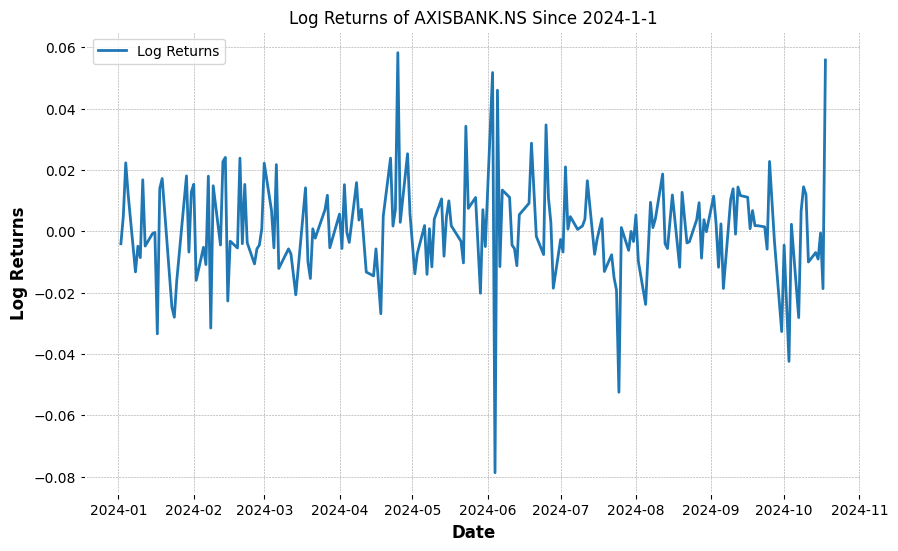

In [ ]:
log_return = log_returns(data)

print(log_return.tail())

# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(log_return, label='Log Returns')
plt.title(f'Log Returns of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

VOLATITLITY FOR MONTE CARLO

In [ ]:
def volatility_calc(lr):
    daily_volatility = np.std(lr)
    return daily_volatility

In [ ]:
# Test
log_return = log_returns(data)
print(volatility_calc(log_return))

0.016400741169803182


In [ ]:
num_simulations = 100
num_days = 2

# Get the closing price for the last day of the stock data
last_price = data['Close'].iloc[-1]

MONTE CARLO SIMULATION


In [ ]:
def run_monteCarlo(num_simulations, num_days, last_price, log_return):
    # Calculate daily volatility
    daily_vol = volatility_calc(log_return)

    # Initialize a list to store all simulation results
    all_simulations = []

    for x in range(num_simulations):
        price_series = [last_price]

        for y in range(1, num_days):
            price = price_series[-1] * (1 + np.random.normal(0, daily_vol))
            price_series.append(price)

        all_simulations.append(price_series)



    # Convert the list of simulations into a DataFrame all at once
    simulation_df = pd.DataFrame(all_simulations).transpose()

    return simulation_df

In [ ]:
# Test
log_return = log_returns(data)
simulation_df = run_monteCarlo(num_simulations , num_days , last_price , log_return)

simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,...,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976,1196.849976
1,1221.548480,1218.219404,1194.900549,1206.246067,1170.101100,1218.044368,1207.993571,1187.159795,1230.635999,1178.919721,...,1200.222911,1195.326493,1206.103621,1177.679535,1211.983804,1166.398236,1214.664813,1225.626225,1202.429144,1175.803058


PLOTTING MONTE CARLO


Text(0, 0.5, 'Price')

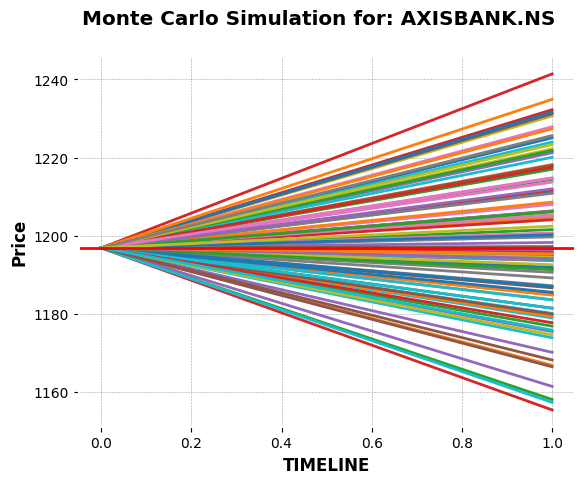

In [ ]:
simulation_df.plot(legend=False)
plt.suptitle(f'Monte Carlo Simulation for: {ticker}')
plt.axhline(y = last_price, color = 'r', linestyle= '-')
plt.xlabel('TIMELINE')
plt.ylabel('Price')

In [ ]:
# Extract the prices for the end of the second day (which is the last row in this case)
day_2_prices = simulation_df.iloc[-1]  # Last row since num_days = 2

# Calculate the 95% confidence interval
lower_bound = np.percentile(day_2_prices, 2.5)
upper_bound = np.percentile(day_2_prices, 97.5)

# Calculate the mean (expected) price
mean_price = np.mean(day_2_prices)

# Print the results
print(f"The expected price for 2 days later is: {mean_price}")
print(f"The 95% confidence interval for the price 2 days later is: ({lower_bound}, {upper_bound})")

The expected price for 2 days later is: 1198.8771726778455
The 95% confidence interval for the price 2 days later is: (1159.6145720225197, 1231.9359528006707)


In [ ]:
# Calculate the 98% confidence interval
# For a 98% CI, we look for the 1st and 99th percentiles
lower_bound = np.percentile(day_2_prices, 1)
upper_bound = np.percentile(day_2_prices, 99)

# Calculate the mean (expected) price
mean_price = np.mean(day_2_prices)

# Print the results
print(f"The expected price for 2 days later is: {mean_price}")
print(f"The 98% confidence interval for the price 2 days later is: ({lower_bound}, {upper_bound})")

The expected price for 2 days later is: 1198.8771726778455
The 98% confidence interval for the price 2 days later is: (1157.266323818733, 1234.9779669403554)


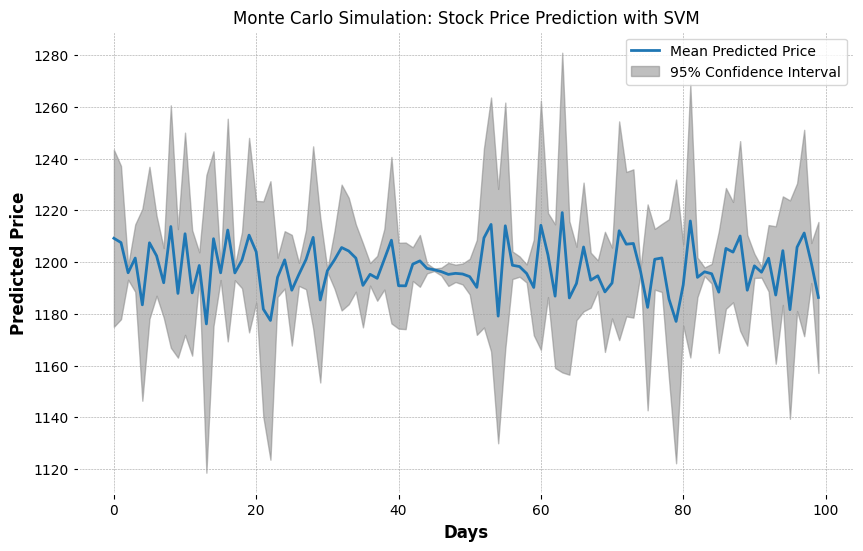

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVR(kernel='rbf', C=100, gamma=0.1)
svm_model.fit(X_train, y_train)

# Make predictions
train_predictions = svm_model.predict(X_train)
test_predictions = svm_model.predict(X_test)

# 4. Analysis: Mean, Variance, and Plotting
mean_predicted_price = simulation_df.mean(axis=0)
std_dev_predicted_price = simulation_df.std(axis=0)

# Plotting the mean predicted price along with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_price, label='Mean Predicted Price')
plt.fill_between(range(len(mean_predicted_price)),
                 mean_predicted_price - 1.96 * std_dev_predicted_price,
                 mean_predicted_price + 1.96 * std_dev_predicted_price,
                 color='gray', alpha=0.5, label='95% Confidence Interval')
plt.title('Monte Carlo Simulation: Stock Price Prediction with SVM')
plt.xlabel('Days')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()